#### Setting Working Directory

In [59]:
import os
os.getcwd()

'C:\\Users\\thars\\Downloads'

In [60]:
#set 
os.chdir(r"C:\Users\thars\Downloads")

#### Import Necessary libraries

In [61]:
import pandas as pd

# Load the dataset
real_estate_data = pd.read_csv(r"C:\Users\thars\Downloads\Real_Estate.csv")

# Display the first few rows of the dataset and info
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

In [62]:
# Let's have a look if data contains any null values aor not
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [63]:
# Let's check the Descriptive Statistics of the dataset
real_estate_data_stats = real_estate_data.describe()
print(real_estate_data_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

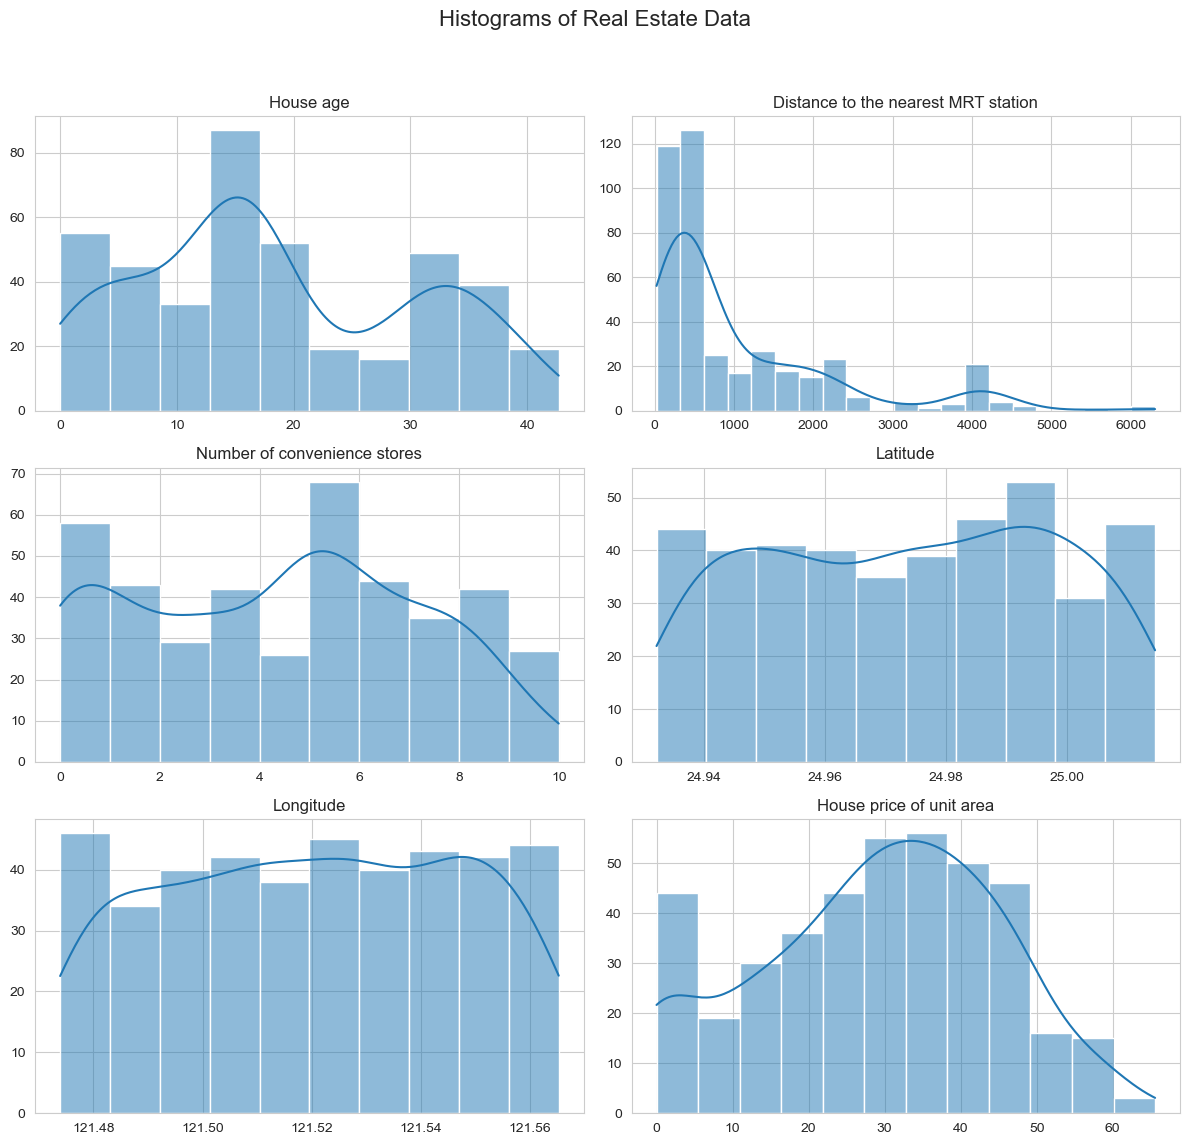

In [64]:
# Lets have a look at the histograms of all the numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle("Histograms of Real Estate Data", fontsize=16)

cols = ["House age", "Distance to the nearest MRT station", "Number of convenience stores", "Latitude",
        "Longitude", "House price of unit area"]

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel("")
    axes[i//2, i%2].set_ylabel("")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


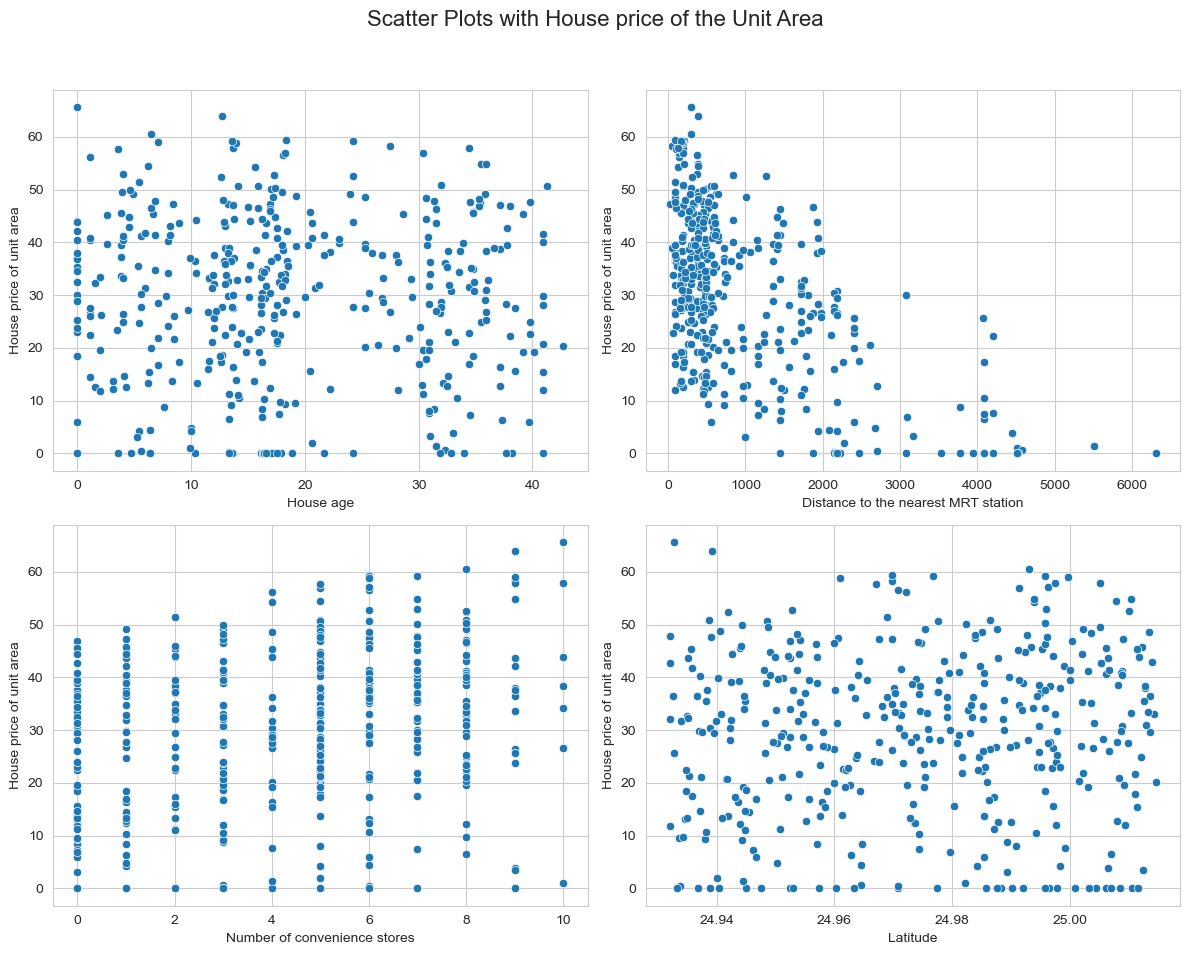

In [65]:
# Scatter plots to observe the relationship with the house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.suptitle("Scatter Plots with House price of the Unit Area", fontsize=16)

# Scatter plot for each variable against the House Price
sns.scatterplot(data=real_estate_data, x="House age", y="House price of unit area", ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x="Distance to the nearest MRT station", y="House price of unit area", ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x="Number of convenience stores", y="House price of unit area", ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x="Latitude", y="House price of unit area", ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() 

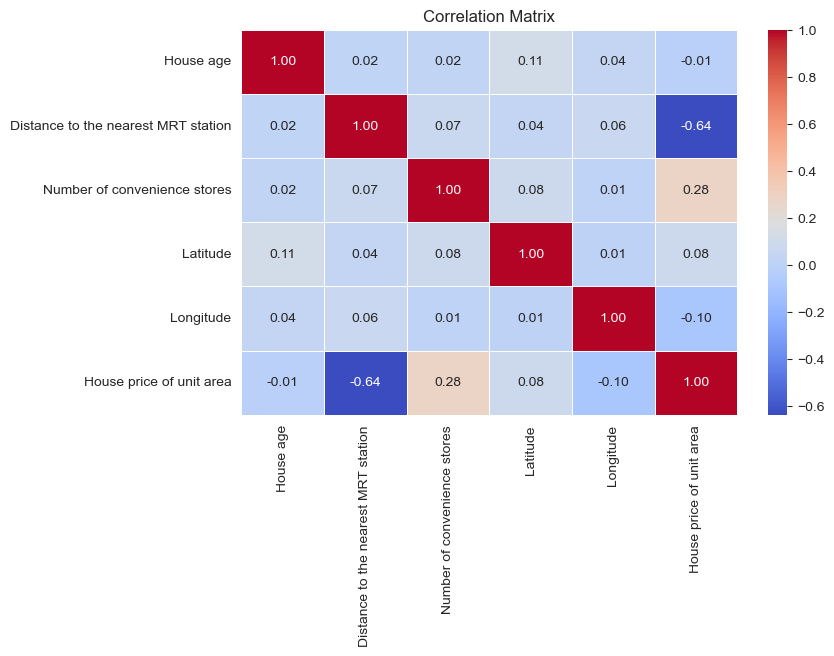

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [66]:
# Finally it would be beneficial to perform correlation analysis to quantify the relationship between these 
# variables, especially how each one correlates with the house price
# Plotting the correlation matrix

numeric_col = real_estate_data.select_dtypes(include=["number"])
correlation_matrix = numeric_col.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [70]:
# Now let's build a regression model to predict the real estate prices by using linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting a features and target variable
features = ["Distance to the nearest MRT station", "Number of convenience stores", "Latitude", "Longitude"]
target = "House price of unit area"

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

# model initialization
model = LinearRegression()

# training the model
model.fit(X_train, y_train)

LinearRegression()

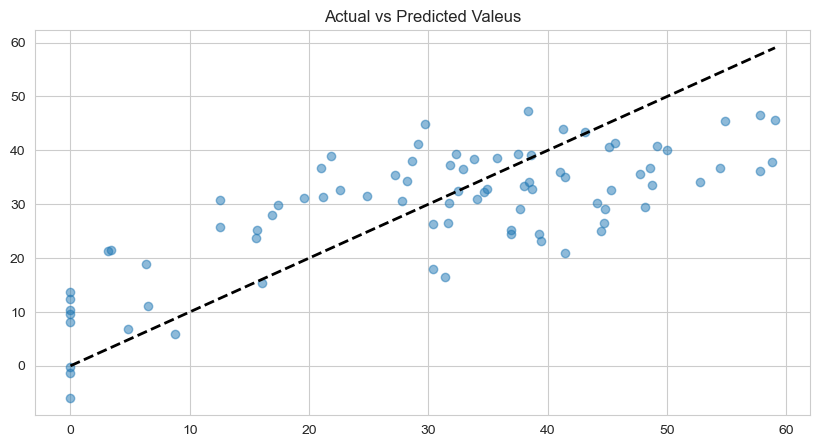

In [81]:
# Let's visualize the actual and predicted values how well our model is performing
y_pred_lr = model.predict(X_test)

# Visualization: Actual Vs. Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.title("Actual vs Predicted Valeus")
plt.show()

In [79]:
[y_test.min(), y_test.max()], [y_test.min(), y_test.max()]

([0.0, 59.0363953028228], [0.0, 59.0363953028228])

In [86]:
y_test - y_pred_lr

358    -2.822866
350     1.468206
373    -2.848178
399     9.463037
369    16.207240
         ...    
31     -8.236724
283    -9.608621
157   -18.043517
203    -8.173408
208    -9.386954
Name: House price of unit area, Length: 83, dtype: float64

In [84]:
y_pred_lr

array([38.58553308, 30.27545642, 30.63507225, 45.36862646, 23.20924222,
       32.62839508, 18.86501864, 29.94261815, 34.07952742,  5.89497833,
       32.85732428, 39.20080259,  9.53933735, 26.59244074, 36.4493457 ,
       30.28723911, 28.04489627, 25.25342026, 32.27376753, 35.64440194,
       40.13217328, 43.49105768, 24.99527978, 26.25085055, 17.96310001,
       35.10917253,  6.82443074, 32.53546274, 44.00560347, 32.58080109,
       35.41056515, 41.43623239, 46.47938892, 47.35823696, 30.94654249,
       29.06540547, 10.44054345, 41.18164338, 40.63191112, 36.76567644,
       40.89561923, 36.21231597, 11.10702158, -0.14343553, 35.9538785 ,
       25.73313557, 45.67606287, 38.33742609, 21.25117677, 38.94286756,
       -1.30303574, 31.26352603, 29.52005768, 33.56703122, 39.25100236,
       32.77587124, 36.74915176, 37.18692139, 44.94999821, 31.178298  ,
       16.49181449, 13.76905296, 29.07959522, 37.79205389, 20.92032617,
       24.53037498, 34.12597274, 24.55838808, 36.80419601, 26.47